## Summative 2 Codes

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Now let us set up visualization style

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)

In [3]:
# Let us now load the dataset

df = pd.read_csv('Land-Ocean Global Means.csv')

In [5]:
# Let us display the first few rows to understand its structure

print("Dataset overview:")
df.head()

Dataset overview:


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.1,-0.17,-0.11,-0.22,-0.19,-0.11,-0.15,-0.24,-0.23,-0.18,-0.18,***,***,-0.12,-0.17,-0.21
1,1881,-0.21,-0.15,0.02,0.04,0.05,-0.2,-0.01,-0.05,-0.16,-0.22,-0.19,-0.08,-0.1,-0.1,-0.18,0.04,-0.08,-0.19
2,1882,0.15,0.13,0.04,-0.17,-0.15,-0.23,-0.17,-0.08,-0.15,-0.24,-0.17,-0.37,-0.12,-0.09,0.07,-0.09,-0.16,-0.19
3,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.15,-0.23,-0.12,-0.25,-0.12,-0.18,-0.2,-0.35,-0.17,-0.1,-0.2
4,1884,-0.14,-0.09,-0.37,-0.4,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.32,-0.29


In [7]:
# Let us check data information

print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    object 
 4   Apr     146 non-null    object 
 5   May     146 non-null    object 
 6   Jun     146 non-null    object 
 7   Jul     146 non-null    object 
 8   Aug     146 non-null    object 
 9   Sep     146 non-null    object 
 10  Oct     146 non-null    object 
 11  Nov     146 non-null    object 
 12  Dec     146 non-null    object 
 13  J-D     146 non-null    object 
 14  D-N     146 non-null    object 
 15  DJF     146 non-null    object 
 16  MAM     146 non-null    object 
 17  JJA     146 non-null    object 
 18  SON     146 non-null    object 
dtypes: float64(2), int64(1), object(16)
memory usage: 21.8+ KB


In [8]:
# Check for missing values

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64


In [9]:
# Basic statistical summary

print("\nStatistical summary:")
print(df.describe())


Statistical summary:
              Year         Jan         Feb
count   146.000000  146.000000  146.000000
mean   1952.500000    0.077466    0.085753
std      42.290661    0.446695    0.450722
min    1880.000000   -0.810000   -0.630000
25%    1916.250000   -0.247500   -0.237500
50%    1952.500000   -0.010000   -0.035000
75%    1988.750000    0.320000    0.397500
max    2025.000000    1.360000    1.430000


In [10]:
# Convert string columns to float where needed
# First, let us check which columns are strings

string_columns = df.select_dtypes(include=['object']).columns
print("String columns:", string_columns)

# Function to convert strings to float (handling '*' and other non-numeric characters)
def convert_to_float(val):
    try:
        return float(val)
    except:
        # Remove any non-numeric characters except the decimal point and minus sign
        clean_val = ''.join(c for c in str(val) if c.isdigit() or c == '.' or c == '-')
        if clean_val:
            return float(clean_val)
        else:
            return np.nan

# Converting string columns to float
for col in string_columns:
    df[col] = df[col].apply(convert_to_float)

# Check if conversion was successful

print("\nData types after conversion:")
print(df.dtypes)

String columns: Index(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

Data types after conversion:
Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
J-D     float64
D-N     float64
DJF     float64
MAM     float64
JJA     float64
SON     float64
dtype: object


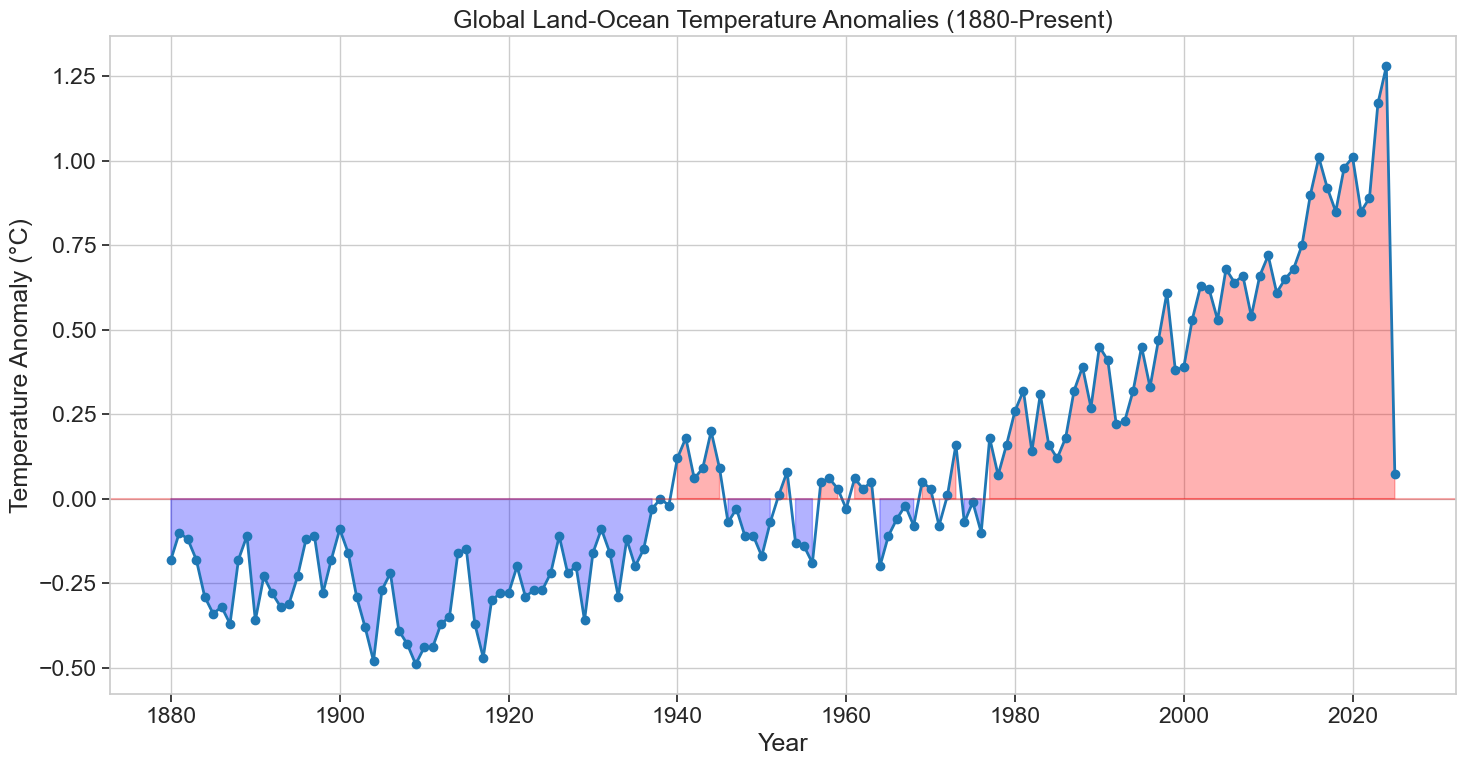

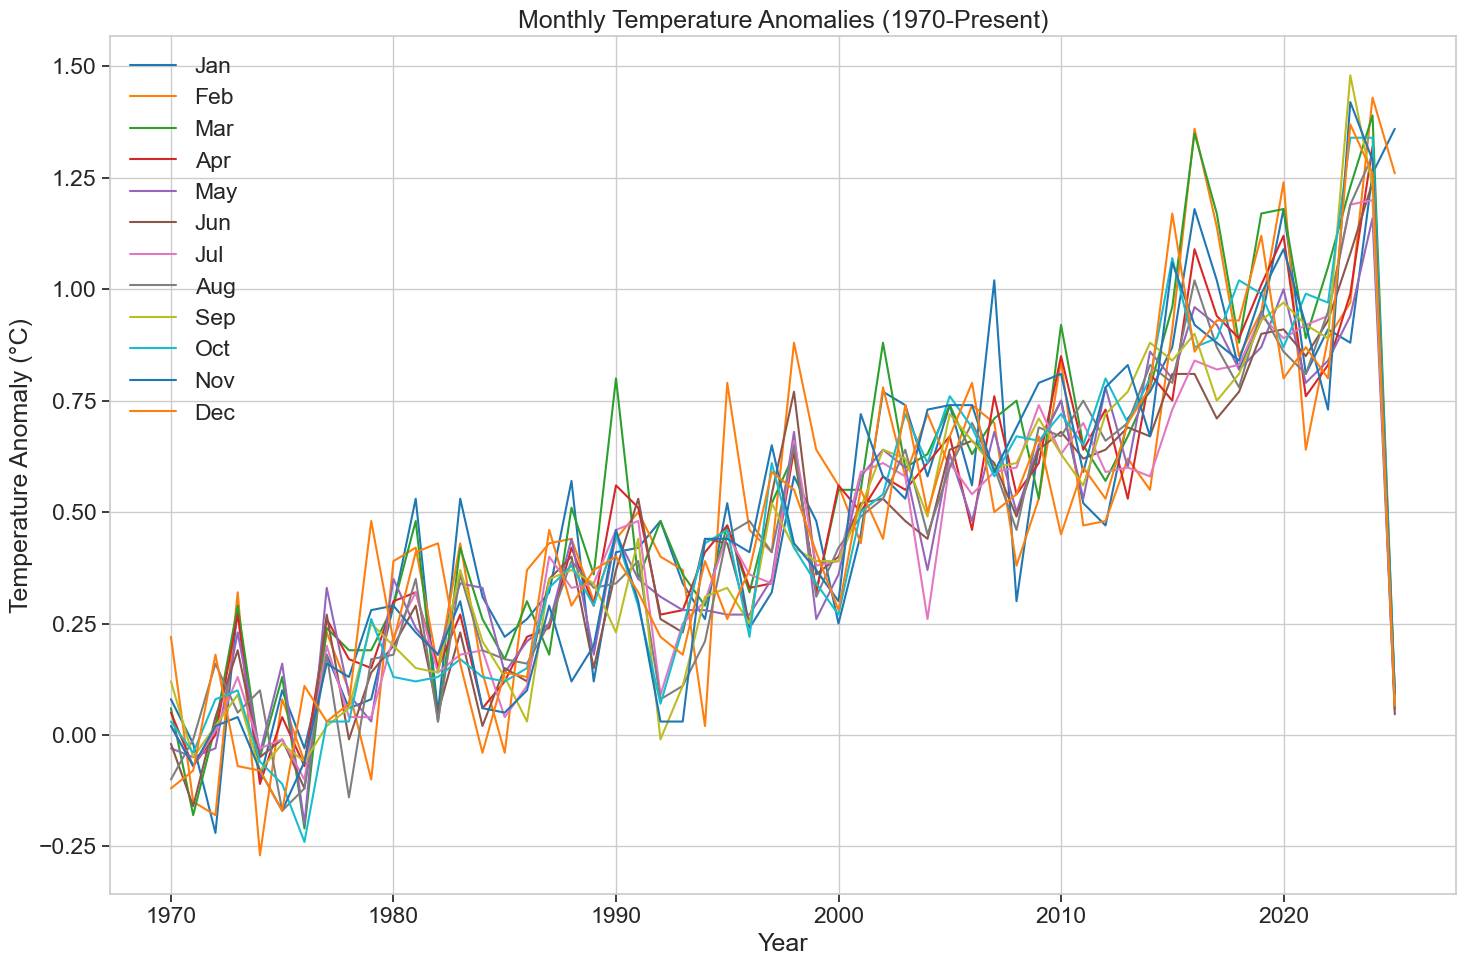

In [12]:
# Create a visualization of temperature anomalies over time
plt.figure(figsize=(15, 8))
plt.plot(df['Year'], df['J-D'], marker='o', linestyle='-', linewidth=2)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.fill_between(df['Year'], 0, df['J-D'], where=(df['J-D'] >= 0), color='red', alpha=0.3)
plt.fill_between(df['Year'], 0, df['J-D'], where=(df['J-D'] < 0), color='blue', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Land-Ocean Temperature Anomalies (1880-Present)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot monthly temperature trends
plt.figure(figsize=(15, 10))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
recent_years = df[df['Year'] >= 1970]  # Last ~50 years for clarity

for month in months:
    plt.plot(recent_years['Year'], recent_years[month], label=month)

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Monthly Temperature Anomalies (1970-Present)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Now, let's prepare features and build our models:

* Training set size: 116 samples
* Testing set size: 30 samples

----------------------------------------------

Model Evaluation - RMSE (lower is better):
=> Linear Regression: 0.1343
=> Decision Tree: 0.1096
=> Random Forest: 0.0971

Model Evaluation - R² (higher is better):
=> Linear Regression: 0.8895
=> Decision Tree: 0.9264
=> Random Forest: 0.9422


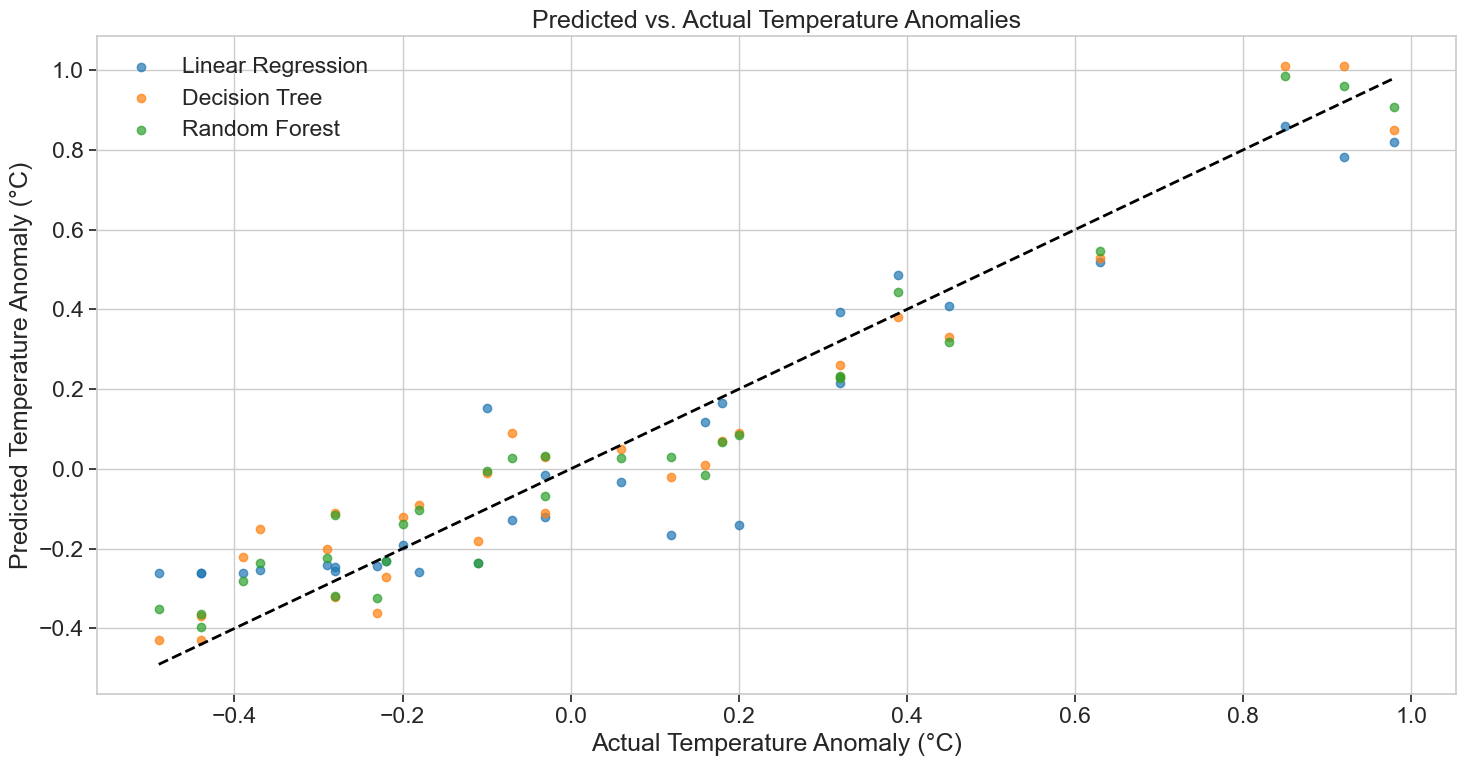

In [18]:
# Feature engineering
# We'll use 'Year' as our main feature and create some additional features
df['Year_squared'] = df['Year']**2  # Non-linear relationship
df['Decade'] = (df['Year'] // 10) * 10  # Decade feature
df['Century'] = (df['Year'] // 100) * 100  # Century feature

# For our target, we'll use the annual mean (J-D column)
X = df[['Year', 'Year_squared']]  # Using year and year-squared as features
y = df['J-D']  # Annual temperature anomaly as target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"* Training set size: {X_train.shape[0]} samples")
print(f"* Testing set size: {X_test.shape[0]} samples")

# Create our models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate models
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

lr_r2 = r2_score(y_test, lr_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("")
print("----------------------------------------------")
print("")

print("Model Evaluation - RMSE (lower is better):")
print(f"=> Linear Regression: {lr_rmse:.4f}")
print(f"=> Decision Tree: {dt_rmse:.4f}")
print(f"=> Random Forest: {rf_rmse:.4f}")

print("\nModel Evaluation - R² (higher is better):")
print(f"=> Linear Regression: {lr_r2:.4f}")
print(f"=> Decision Tree: {dt_r2:.4f}")
print(f"=> Random Forest: {rf_r2:.4f}")

# Visualize model predictions vs actual values
plt.figure(figsize=(15, 8))
plt.scatter(y_test, lr_pred, alpha=0.7, label='Linear Regression')
plt.scatter(y_test, dt_pred, alpha=0.7, label='Decision Tree')
plt.scatter(y_test, rf_pred, alpha=0.7, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Temperature Anomaly (°C)')
plt.ylabel('Predicted Temperature Anomaly (°C)')
plt.title('Predicted vs. Actual Temperature Anomalies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now, let's implement gradient descent from scratch as instructed in the summative assignment:

Gradient Descent Results:
---------------------------
=> Final Parameters (Theta): [0.07378992 0.33805039]
=> Final Cost: 0.01892183382613572


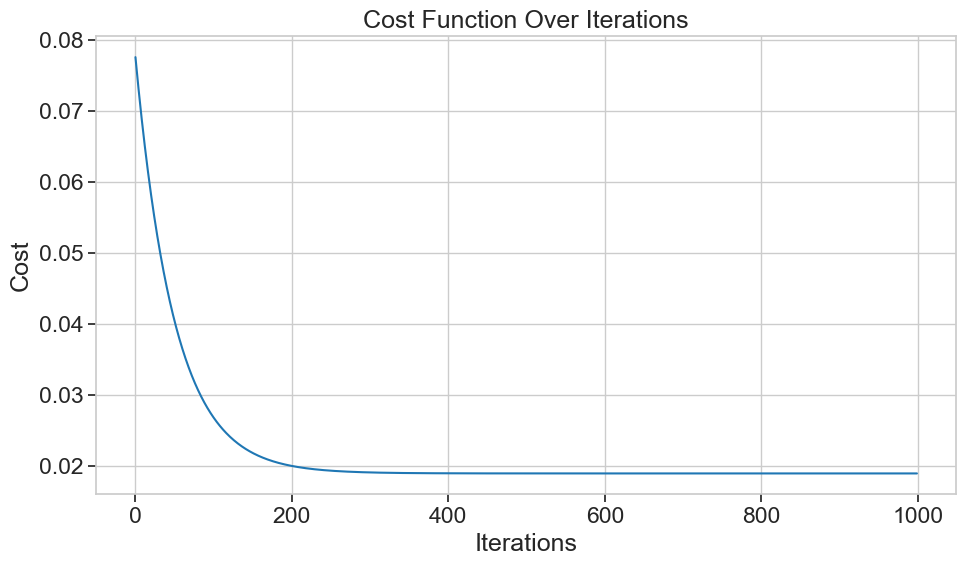

* Gradient Descent RMSE: 0.1789
* Gradient Descent R²: 0.8039

=> The best model is Random Forest with RMSE: 0.0971


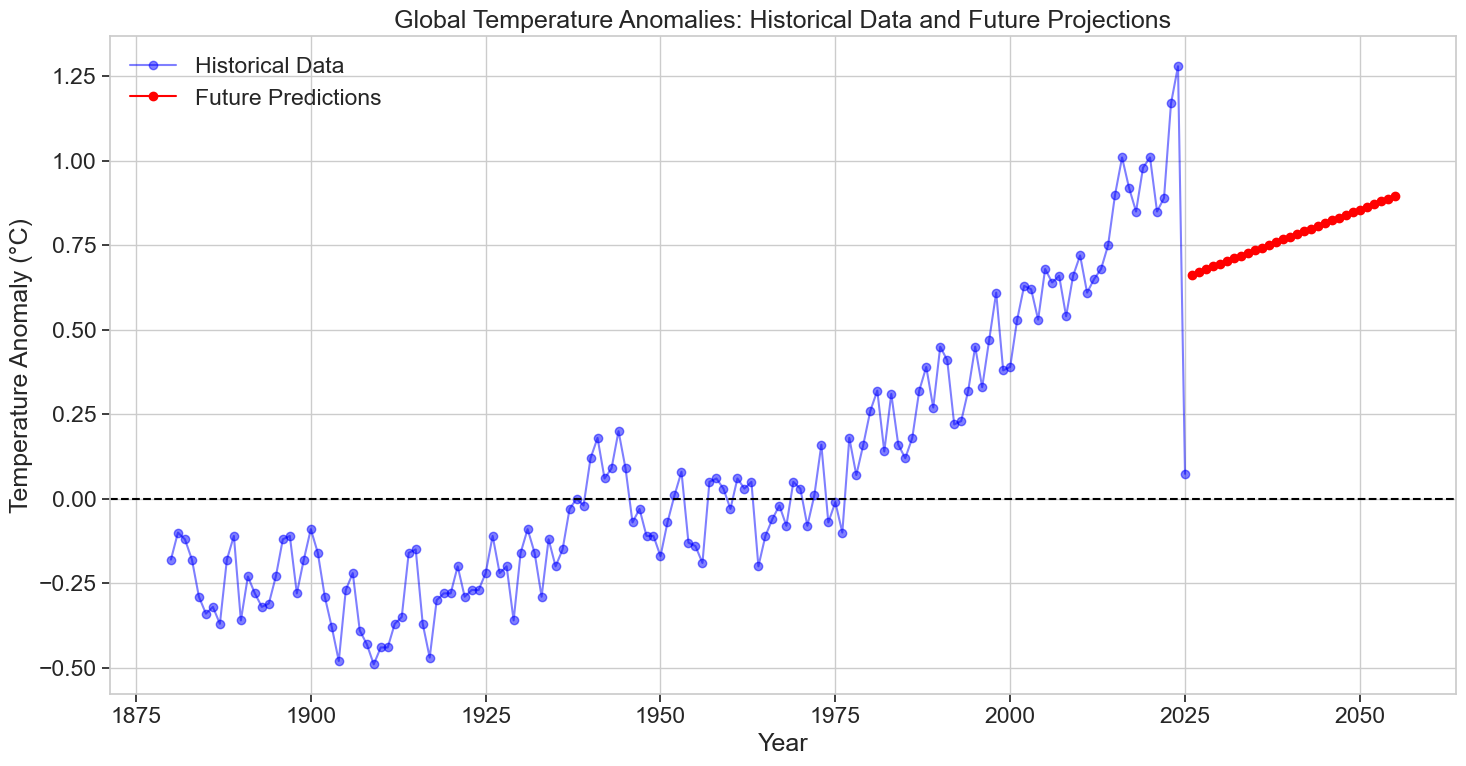

In [21]:
# Implement gradient descent from scratch for linear regression
def cost_function(X, y, theta):
    """Calculate the cost (mean squared error)"""
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Perform gradient descent to minimize cost function
    
    Parameters:
    X: Features matrix (with a column of ones for intercept)
    y: Target values
    theta: Initial parameters
    alpha: Learning rate
    iterations: Number of iterations
    
    Returns:
    theta: Optimized parameters
    cost_history: Record of cost at each iteration
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, len(theta)))
    
    for i in range(iterations):
        # Calculate prediction
        prediction = X.dot(theta)
        
        # Calculate error/loss
        error = prediction - y
        
        # Calculate gradients
        gradients = (1/m) * X.T.dot(error)
        
        # Update parameters
        theta = theta - alpha * gradients
        
        # Store parameters and cost
        theta_history[i] = theta
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history, theta_history

# Prepare data for gradient descent
# We'll use only 'Year' as a feature for simplicity

X_gd = df[['Year']].values

# Normalize X for better convergence

X_mean = np.mean(X_gd)
X_std = np.std(X_gd)
X_gd_norm = (X_gd - X_mean) / X_std

# Add intercept term

X_gd_norm = np.c_[np.ones(X_gd_norm.shape[0]), X_gd_norm]

y_gd = df['J-D'].values

# Initialize parameters (theta)

theta = np.zeros(X_gd_norm.shape[1])

# Set hyperparameters

alpha = 0.01  # Learning rate
iterations = 1000

# Run gradient descent

theta_optimal, cost_history, theta_history = gradient_descent(X_gd_norm, y_gd, theta, alpha, iterations)

# Print results

print("Gradient Descent Results:")
print("---------------------------")
print(f"=> Final Parameters (Theta): {theta_optimal}")
print(f"=> Final Cost: {cost_history[-1]}")

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Make predictions using gradient descent model

X_test_gd = np.c_[np.ones(len(X_test)), (X_test['Year'].values - X_mean) / X_std]
y_pred_gd = X_test_gd.dot(theta_optimal)

# Calculate RMSE for gradient descent

gd_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gd))
gd_r2 = r2_score(y_test, y_pred_gd)

print(f"* Gradient Descent RMSE: {gd_rmse:.4f}")
print(f"* Gradient Descent R²: {gd_r2:.4f}")

# Compare all models

models = {
    'Linear Regression': lr_rmse,
    'Decision Tree': dt_rmse,
    'Random Forest': rf_rmse,
    'Gradient Descent': gd_rmse
}

# Find the best model

best_model = min(models, key=models.get)
print(f"\n=> The best model is {best_model} with RMSE: {models[best_model]:.4f}")

# Visualize predictions for the future

future_years = np.array(range(df['Year'].max() + 1, df['Year'].max() + 31)).reshape(-1, 1)  # Next 30 years
future_X = np.c_[np.ones(len(future_years)), (future_years - X_mean) / X_std]
future_predictions = future_X.dot(theta_optimal)

# Plot historical data and future predictions

plt.figure(figsize=(15, 8))
plt.plot(df['Year'], df['J-D'], 'bo-', alpha=0.5, label='Historical Data')
plt.plot(future_years, future_predictions, 'ro-', label='Future Predictions')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies: Historical Data and Future Projections')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Finally, let's save the best model for our Task 2

In [22]:
# Determine which model to save (based on RMSE)
models_dict = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Descent': theta_optimal  # For GD, we save the parameters
}

# Save the best model
import pickle

if best_model == 'Gradient Descent':
    # For gradient descent, save the parameters and preprocessing info
    model_info = {
        'theta': theta_optimal,
        'X_mean': X_mean,
        'X_std': X_std
    }
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(model_info, f)
else:
    # For scikit-learn models
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(models_dict[best_model], f)

print(f"The {best_model} model has been saved as 'best_model.pkl'")

# Create a prediction function that will be used in Task 2
def predict_temperature(year, model_type=best_model):
    """
    Predict temperature anomaly for a given year
    
    Parameters:
    year: Year to predict for
    model_type: Which model to use for prediction
    
    Returns:
    prediction: Predicted temperature anomaly
    """
    if model_type == 'Gradient Descent':
        # Normalize input
        year_norm = (year - X_mean) / X_std
        # Add intercept term
        X_pred = np.array([1, year_norm])
        # Make prediction
        prediction = X_pred.dot(theta_optimal)
    else:
        # For scikit-learn models
        if model_type == 'Linear Regression':
            model = lr_model
        elif model_type == 'Decision Tree':
            model = dt_model
        elif model_type == 'Random Forest':
            model = rf_model
        
        # Make prediction
        X_pred = np.array([[year, year**2]])
        prediction = model.predict(X_pred)[0]
    
    return prediction

# Test the prediction function
current_year = 2025
prediction = predict_temperature(current_year)
print(f"Predicted temperature anomaly for {current_year}: {prediction:.4f}°C")

# Save the prediction function for Task 2
with open('prediction_function.py', 'w') as f:
    f.write("""
import numpy as np
import pickle

def load_model(model_path='best_model.pkl'):
    \"\"\"Load the trained model\"\"\"
    with open(model_path, 'rb') as f:
        return pickle.load(f)

def predict_temperature(year, model_info=None):
    \"\"\"
    Predict temperature anomaly for a given year
    
    Parameters:
    year: Year to predict for
    model_info: Loaded model information
    
    Returns:
    prediction: Predicted temperature anomaly
    \"\"\"
    if model_info is None:
        model_info = load_model()
    
    # Check if it's a gradient descent model or scikit-learn model
    if isinstance(model_info, dict) and 'theta' in model_info:
        # Gradient Descent model
        theta = model_info['theta']
        X_mean = model_info['X_mean']
        X_std = model_info['X_std']
        
        # Normalize input
        year_norm = (year - X_mean) / X_std
        # Add intercept term
        X_pred = np.array([1, year_norm])
        # Make prediction
        prediction = X_pred.dot(theta)
    else:
        # Scikit-learn model
        X_pred = np.array([[year, year**2]])
        prediction = model_info.predict(X_pred)[0]
    
    return prediction

if __name__ == "__main__":
    # Example usage
    model_info = load_model()
    current_year = 2025
    prediction = predict_temperature(current_year, model_info)
    print(f"Predicted temperature anomaly for {current_year}: {prediction:.4f}°C")
""")

print("Prediction function saved to 'prediction_function.py'")

The Random Forest model has been saved as 'best_model.pkl'
Predicted temperature anomaly for 2025: 0.4887°C
Prediction function saved to 'prediction_function.py'


C:\Users\robot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
